In [88]:
import pandas as pd
import numpy as np


In [89]:
weather01 = pd.read_csv('IndianWeatherRepository 1.csv')
weather01.iloc[0]


country                                    India
location_name                         Ashoknagar
region                            Madhya Pradesh
latitude                                   24.57
longitude                                  77.72
timezone                            Asia/Kolkata
last_updated_epoch                    1693286100
last_updated                    2023-08-29 10:45
temperature_celsius                         27.5
temperature_fahrenheit                      81.5
condition_text                     Partly cloudy
wind_mph                                    12.8
wind_kph                                    20.5
wind_degree                                  281
wind_direction                               WNW
pressure_mb                               1008.0
pressure_in                                29.77
precip_mm                                    0.0
precip_in                                    0.0
humidity                                      67
cloud               

In [90]:
columns_to_drop =['air_quality_gb-defra-index','country','latitude','longitude','air_quality_us-epa-index','timezone','condition_text','air_quality_Sulphur_dioxide','air_quality_PM2.5','last_updated_epoch','moon_phase','moon_illumination','wind_mph','wind_degree','wind_direction','pressure_mb','precip_in','feels_like_fahrenheit','visibility_miles','uv_index','gust_mph','gust_kph','temperature_fahrenheit','cloud','visibility_km','air_quality_PM10','sunrise','sunset','moonrise','moonset','air_quality_Ozone','air_quality_Carbon_Monoxide']
weather01 = weather01.drop(columns_to_drop, axis=1)
weather01.head()
weather01


,location_name,region,last_updated,temperature_celsius,wind_kph,pressure_in,precip_mm,humidity,feels_like_celsius,air_quality_Nitrogen_dioxide
0,Ashoknagar,Madhya Pradesh,2023-08-29 10:45,27.5,20.5,29.77,0.0,67,29.7,1.7
1,Raisen,Madhya Pradesh,2023-08-29 10:45,27.5,15.5,29.78,0.0,70,30.0,2.1
2,Chhindwara,Madhya Pradesh,2023-08-29 10:45,26.3,18.4,29.78,0.0,70,28.2,0.6
3,Betul,Madhya Pradesh,2023-08-29 10:45,25.6,16.9,29.80,0.0,76,27.6,1.2
4,Hoshangabad,Madhya Pradesh,2023-08-29 10:45,27.2,16.2,29.79,0.0,74,29.9,2.2
...,...,...,...,...,...,...,...,...,...,...
109531,Niwari,Uttar Pradesh,2024-03-19 22:00,25.0,6.1,29.94,0.0,39,23.8,32.9
109532,Saitual,Mizoram,2024-03-19 22:00,20.6,3.6,29.92,0.0,34,20.7,4.8
109533,Ranipet,Tamil Nadu,2024-03-19 22:00,23.8,11.5,29.91,0.0,72,25.6,7.1
109534,Tenkasi,Tamil Nadu,2024-03-19 22:00,30.0,9.0,29.88,0.0,62,37.7,4.2


In [91]:
first_row = weather01.iloc[0]
print(first_row)

location_name                         Ashoknagar
region                            Madhya Pradesh
last_updated                    2023-08-29 10:45
temperature_celsius                         27.5
wind_kph                                    20.5
pressure_in                                29.77
precip_mm                                    0.0
humidity                                      67
feels_like_celsius                          29.7
air_quality_Nitrogen_dioxide                 1.7
Name: 0, dtype: object


In [92]:
#renaming our columns
weather01 = weather01.rename(columns={'location_name':'location','last_updated':'date','condition_text':'cloud_cover'})
weather01.shape

(109536, 10)

In [93]:
# Converting 'date' column to datetime format
weather01['date_time'] = pd.to_datetime(weather01['date'], format='%Y-%m-%d %H:%M')
weather01.head()


,location,region,date,temperature_celsius,wind_kph,pressure_in,precip_mm,humidity,feels_like_celsius,air_quality_Nitrogen_dioxide,date_time
0,Ashoknagar,Madhya Pradesh,2023-08-29 10:45,27.5,20.5,29.77,0.0,67,29.7,1.7,2023-08-29 10:45:00
1,Raisen,Madhya Pradesh,2023-08-29 10:45,27.5,15.5,29.78,0.0,70,30.0,2.1,2023-08-29 10:45:00
2,Chhindwara,Madhya Pradesh,2023-08-29 10:45,26.3,18.4,29.78,0.0,70,28.2,0.6,2023-08-29 10:45:00
3,Betul,Madhya Pradesh,2023-08-29 10:45,25.6,16.9,29.80,0.0,76,27.6,1.2,2023-08-29 10:45:00
4,Hoshangabad,Madhya Pradesh,2023-08-29 10:45,27.2,16.2,29.79,0.0,74,29.9,2.2,2023-08-29 10:45:00


In [94]:
#Now we will calculate Temporal aggregation which we will use further 
# Calculate daily average temperature, humidity, and total precipitation
daily_aggregated_data = weather01.resample('D', on='date_time').agg({
    'temperature_celsius': 'mean',
    'humidity': 'mean',
    'precip_mm': 'sum'
})

print("Daily Aggregated Data:")
print(daily_aggregated_data.head())

Daily Aggregated Data:
            temperature_celsius   humidity  precip_mm
date_time                                            
2023-08-29            29.666667  59.926335       27.1
2023-08-30            28.246909  65.676364       26.2
2023-08-31            24.940182  76.690909      122.4
2023-09-01            25.379779  76.154412      206.0
2023-09-02            25.628780  75.327869      268.4


In [95]:
weather01=weather01.drop('date',axis=1)
weather01.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109536 entries, 0 to 109535
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   location                      109536 non-null  object        
 1   region                        109536 non-null  object        
 2   temperature_celsius           109536 non-null  float64       
 3   wind_kph                      109536 non-null  float64       
 4   pressure_in                   109536 non-null  float64       
 5   precip_mm                     109536 non-null  float64       
 6   humidity                      109536 non-null  int64         
 7   feels_like_celsius            109536 non-null  float64       
 8   air_quality_Nitrogen_dioxide  109536 non-null  float64       
 9   date_time                     109536 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 8.4+ MB


In [96]:
#Grouping differet locations for further actions
grouped_data = weather01.groupby(['location'])
#you can repeat this function with different locations

derived_group_name = None

city_name= input('enter city name:')

derived_group_name = city_name
City = grouped_data.get_group(derived_group_name)
City
City=City.set_index('date_time')
City.tail(90)


,location,region,temperature_celsius,wind_kph,pressure_in,precip_mm,humidity,feels_like_celsius,air_quality_Nitrogen_dioxide
date_time,,,,,,,,,
2023-12-22 00:15:00,Satna,Madhya Pradesh,12.4,5.0,30.02,0.0,38,12.4,13.9
2023-12-23 00:00:00,Satna,Madhya Pradesh,13.5,5.0,30.03,0.0,33,13.7,13.0
2023-12-24 00:15:00,Satna,Madhya Pradesh,14.1,4.3,30.07,0.0,37,14.6,10.3
2023-12-25 00:15:00,Satna,Madhya Pradesh,14.1,4.0,30.09,0.0,50,14.7,9.4
2023-12-26 00:00:00,Satna,Madhya Pradesh,13.8,3.6,30.04,0.0,49,13.8,18.2
...,...,...,...,...,...,...,...,...,...
2024-03-15 22:00:00,Satna,Madhya Pradesh,24.0,10.8,29.90,0.0,21,23.4,5.6
2024-03-16 22:00:00,Satna,Madhya Pradesh,23.8,14.0,29.96,0.0,14,23.1,5.9
2024-03-17 22:15:00,Satna,Madhya Pradesh,26.2,6.8,29.91,0.0,18,24.6,8.8


In [97]:
# Now we will perform 'Moving Averages' for short term fluctuation in the dataset
# Calculate 7-day moving average of temperature
City['temperature_7day_ma'] = City['temperature_celsius'].rolling(window=7).mean()
City['humidity_7day_ma'] = City['humidity'].rolling(window=7).mean()
City['wind_speed_7day_ma'] = City['wind_kph'].rolling(window=7).mean()
print("weather01 Data with Moving Averages:")
print(City[[ 'temperature_celsius', 'temperature_7day_ma','humidity','humidity_7day_ma','wind_kph','wind_speed_7day_ma']])
#Remember these are new columns in our dataset

weather01 Data with Moving Averages:
                     temperature_celsius  temperature_7day_ma  humidity  \
date_time                                                                 
2023-08-29 10:45:00                 30.1                  NaN        58   
2023-08-30 08:45:00                 28.4                  NaN        65   
2023-08-31 05:15:00                 26.6                  NaN        67   
2023-09-01 05:15:00                 27.4                  NaN        64   
2023-09-02 05:15:00                 27.8                  NaN        63   
...                                  ...                  ...       ...   
2024-03-15 22:00:00                 24.0            23.942857        21   
2024-03-16 22:00:00                 23.8            24.314286        14   
2024-03-17 22:15:00                 26.2            24.771429        18   
2024-03-18 22:00:00                 24.7            24.800000        16   
2024-03-19 21:45:00                 25.0            24.814286  

In [98]:
#  SVM model training 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

City.dropna(inplace=True)



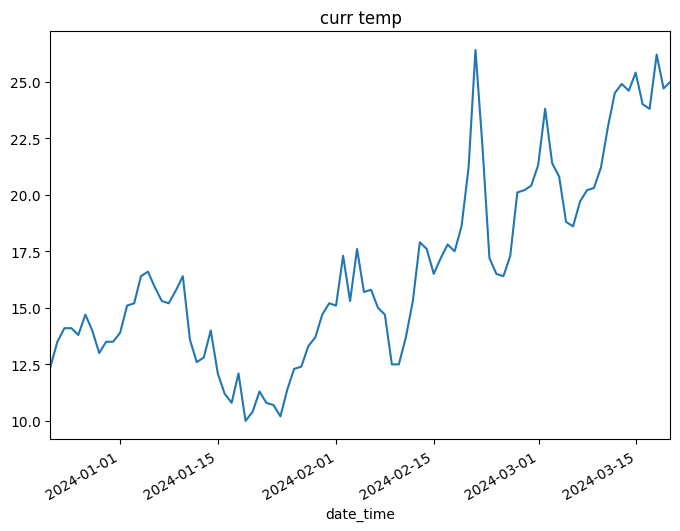

In [99]:

import matplotlib.pyplot as plt
City['temperature_celsius']['2023-12-22 00:15:00':'2024-03-19 21:45:00'].plot(title='curr temp', figsize=(8, 6)).autoscale(axis='x', tight=True)



In [100]:
# selecting the independent feature i.e., features in which the ML model will be trained 
independent_feature= ['wind_kph','pressure_in','precip_mm','humidity','air_quality_Nitrogen_dioxide'] 
# selecting the targeted feature i.e., features that will be predicted based on their respective value in independent feature
targeted_feature= ['temperature_celsius']

In [101]:
X_train,X_test,y_train,y_test = train_test_split(City[independent_feature],City[targeted_feature],test_size=0.3,random_state=3)
X_train.shape, X_test.shape

((135, 5), (59, 5))

In [102]:
# creating the svr model with approprieate hyperparameter tuning techniques
svr=SVR(kernel='linear',C = 100, epsilon=1)


In [103]:
# training the model
svr.fit(X_train, y_train)


c:\Users\shree\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, epsilon=1, kernel='linear')

In [104]:
y_pred = svr.predict(X_test)
y_pred=pd.DataFrame(y_pred)

y_pred.columns = ['Predicted Value'] 

In [105]:
import pandas as pd


df1 = pd.DataFrame(y_test)
df2 = pd.DataFrame(y_pred)

df1.index = y_test.index  
df2.index = df1.index  



difference = pd.DataFrame({'difference': df1.iloc[:, 0] - df2.iloc[:, 0]})

merged_df = pd.concat([df1, df2, difference], axis=1)
merged_df

,temperature_celsius,Predicted Value,difference
date_time,,,
2023-10-08 02:30:00,23.9,24.141794,-0.241794
2023-09-29 04:00:00,25.9,24.548885,1.351115
2023-09-18 04:15:00,23.9,27.056281,-3.156281
2023-11-29 01:15:00,15.7,17.031809,-1.331809
2023-12-27 00:30:00,14.7,14.015624,0.684376
2024-01-25 22:45:00,12.3,13.551523,-1.251523
2024-01-26 23:30:00,12.4,12.801034,-0.401034
2023-11-20 01:15:00,19.4,15.920564,3.479436
2023-09-16 04:00:00,23.8,27.441105,-3.641105


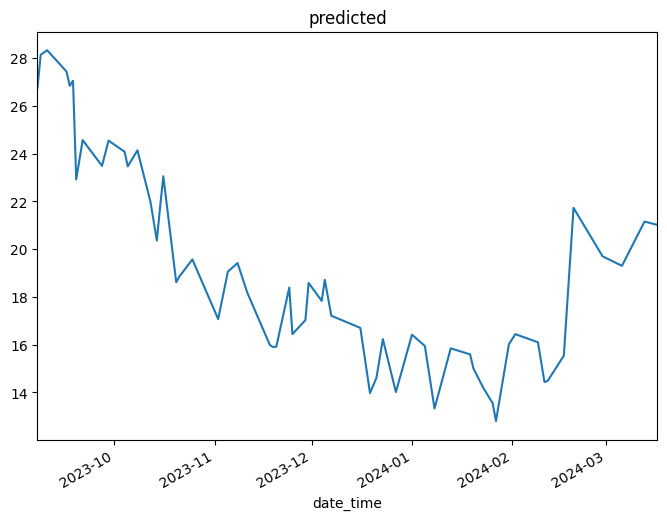

In [106]:
merged_df['Predicted Value'].plot(title='predicted', figsize=(8, 6)).autoscale(axis='x', tight=True)


In [115]:
import numpy as np
from sklearn.svm import SVR

new_data = np.array([[5.0,30.02,0.0,38,12.4]]) 

# Predict the temperature for the new data
predicted_temperature = svr.predict(new_data)

# Print the predicted temperature
print(f"Predicted temperature: {predicted_temperature[0]:.4f} degrees Celsius")


Predicted temperature: 16.3441 degrees Celsius


c:\Users\shree\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [108]:
from sklearn.metrics import r2_score

In [109]:
r2_score(y_test,y_pred)

0.7454684387367745

In [110]:
from sklearn.metrics import mean_squared_error

def mse(y_test, y_pred):

  return mean_squared_error(y_test, y_pred)

mse(y_test,y_pred)

5.689342688891554

In [111]:
def rmse(y_true, y_pred):

  return np.sqrt(mse(y_true, y_pred))

rmse(y_test,y_pred)

2.385234304820295

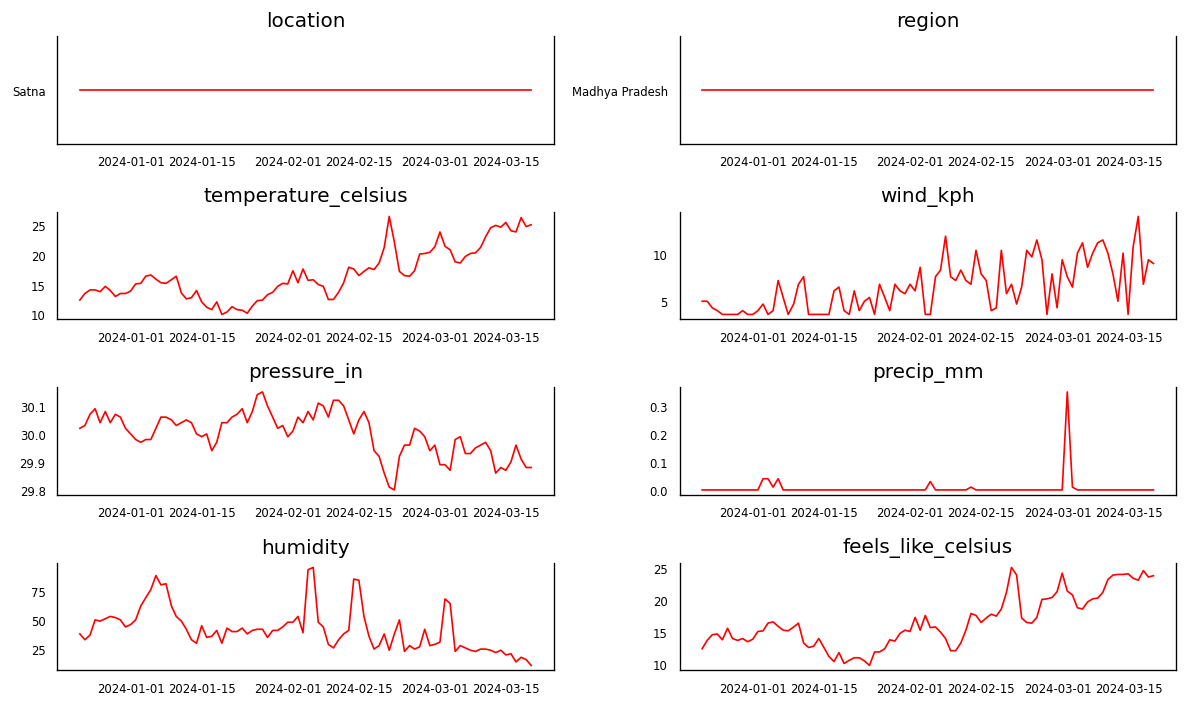

In [112]:

fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = City[City.columns[i]]['2023-12-22 00:15:00':'2024-03-19 21:45:00']
    ax.plot(data, color='red', linewidth=1)

    ax.set_title(City.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=7)
plt.tight_layout()


In [113]:
import pickle
with open('model.pkl','wb') as files:
    pickle.dump(svr, files)
